# TYPES OF VARIABLES

### A small introductory notebook on how to handle different types of variables in Pandas and numpy

Import numpy and pandas modules

In [1]:
import pandas as pd

#magic command for numpy in-notebook visualization with matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Create a random vector (array) of size N = 1000 (values in $[0, 1]$)

In [2]:
N = 1000
quantitative_array = np.random.random(size=N)

Numpy allows to vectorize operations

In [3]:
((quantitative_array + 2) * 5)[:5] #show only first five

array([14.12143077, 10.12295254, 11.11474681, 10.28187638, 12.45644326])

This is not possible with python lists (here the "+" symbol has a different meaning)

In [4]:
list(quantitative_array) + 2

TypeError: can only concatenate list (not "int") to list

In [5]:
(list(quantitative_array) + [2])[-5:]

[0.14519830941829903,
 0.8062083607347614,
 0.1890531767756255,
 0.927811071234653,
 2]

and also "*"

In [6]:
len(list(quantitative_array) * 5)

5000

In [7]:
[1, 2, 3]*5

[1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3]

Numpy data types:

*int, bool, float, complex, bytes, str, unicode, buffer, object (all others)*

Convert the array to a Pandas Series

In [10]:
quantitative_series = pd.Series(quantitative_array)
quantitative_series.head()

0    0.824286
1    0.024591
2    0.222949
3    0.056375
4    0.491289
dtype: float64

Pandas is based on numpy structures, so that it is possible to perform the same operations

In [11]:
(quantitative_series+2).head()

0    2.824286
1    2.024591
2    2.222949
3    2.056375
4    2.491289
dtype: float64

Plot the data histogram

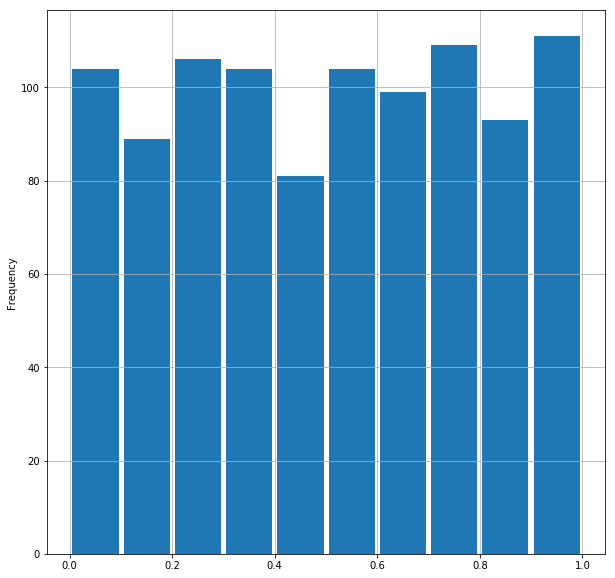

In [12]:
quantitative_series.plot.hist(grid=True, rwidth=.9, figsize = (10, 10))

What if we cast the data to "category" type?

In [13]:
quantitative_series.astype('category').describe()

count     1000.000000
unique    1000.000000
top          0.999861
freq         1.000000
dtype: float64

Pandas allows us to divide the dataset into ordered classes of categorical variables

In [14]:
num_classes = 3

In [15]:
categorical_series = pd.cut(quantitative_series, 
                            num_classes, 
                            labels=['low', 'medium', 'high'])

In [16]:
categorical_series.head()

0      high
1       low
2       low
3       low
4    medium
dtype: category
Categories (3, object): [low < medium < high]

In [17]:
categorical_series.describe()

count     1000
unique       3
top       high
freq       346
dtype: object

In [20]:
categorical_series[0] > categorical_series[1]

False

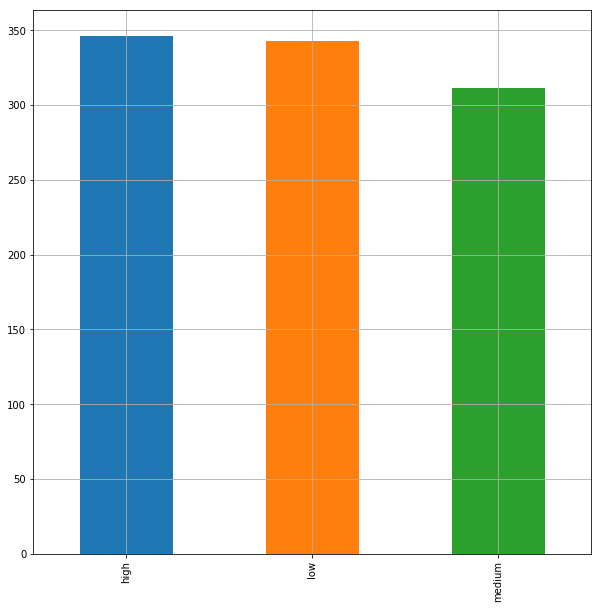

In [21]:
categorical_series.value_counts().plot.bar(grid=True, figsize = (10, 10))

We can generate also non-ordered categorical variables starting from lists of objects

In [22]:
categorical_series_noord = pd.Categorical([1, 2, 1, 1, 3, 3], 
                                           categories=[1, 2, 3], 
                                           ordered=False)

In [23]:
categorical_series_noord

[1, 2, 1, 1, 3, 3]
Categories (3, int64): [1, 2, 3]

**...but be careful! (1)**

In [24]:
categorical_series_noord2 = pd.Categorical([1, 2, 1, 1, 3, 3], 
                                           categories=[1, 2], 
                                           ordered=False)

In [25]:
categorical_series_noord2

[1.0, 2.0, 1.0, 1.0, NaN, NaN]
Categories (2, int64): [1, 2]

**...but be careful! (2)**

In [26]:
categorical_series_noord

[1, 2, 1, 1, 3, 3]
Categories (3, int64): [1, 2, 3]

In [27]:
categorical_series_noord.describe()

,counts,freqs
categories,,
1,3,0.500000
2,1,0.166667
3,2,0.333333


In [28]:
categorical_series_noord[2] < categorical_series_noord[1]

True